In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("fdeec17.csv")


In [108]:
data["ACTEU"].unique()

array([ 1.,  3.,  2., nan])

In [110]:
data["ACTEU"].value_counts(dropna=False)

ACTEU
3.0    207520
1.0    198054
2.0     21864
NaN      1204
Name: count, dtype: int64

In [115]:
data["ACTEU"].describe()

count      427438
unique          3
top       Inactif
freq       207520
Name: ACTEU, dtype: object

In [42]:
print(data["ACTEU"])

0         Actif occupé
1         Actif occupé
2         Actif occupé
3         Actif occupé
4         Actif occupé
              ...     
428637         Inactif
428638         Inactif
428639         Inactif
428640         Inactif
428641         Inactif
Name: ACTEU, Length: 428642, dtype: object


In [112]:
data["ACTEU"] = data["ACTEU"].map({1:"Actif occupé",2:"Chômeur",3:"Inactif", "nan":"NaN"})

In [120]:
data["ACTEU"].value_counts(normalize=True, dropna=False)*100

ACTEU
Inactif         48.413361
Actif occupé    46.204992
Chômeur          5.100760
NaN              0.280887
Name: proportion, dtype: float64

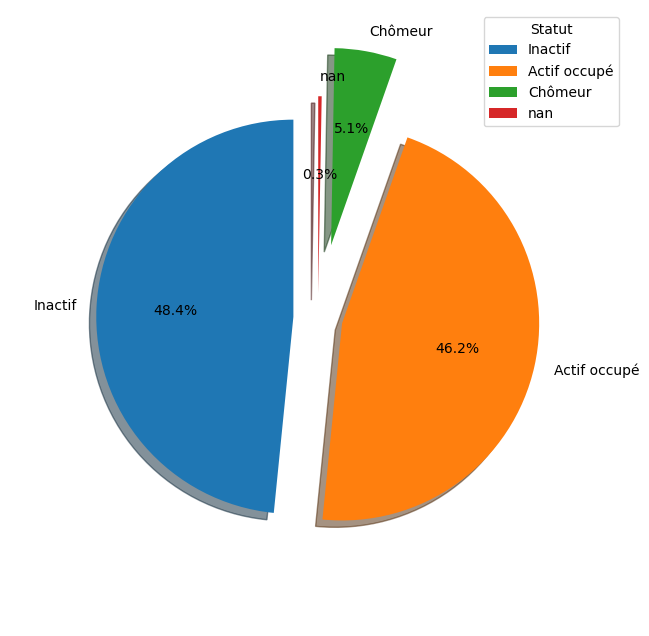

In [165]:
data_pie = data["ACTEU"].value_counts(dropna=False)
labels = data_pie.index

e = (0.1, 0.1, 0.3, 0.1)
plt.figure(figsize=(8,8))
plt.pie(data_pie, explode=e, labels=labels, autopct='%1.1f%%', shadow=True, radius=0.8, startangle= 90)
plt.legend(data_pie.index,title="Statut")
plt.show()

In [147]:
data['ACTEU6'] = data['ACTEU6'].map({1:"Actif occupé",3:"Chômeur PSERE",4:"Autre chômeur BIT",5:"Etudiant, élève, stagiaire en formation (inactifs)",6:"Autres inactifs (dont retraités)","nan":"NaN"})


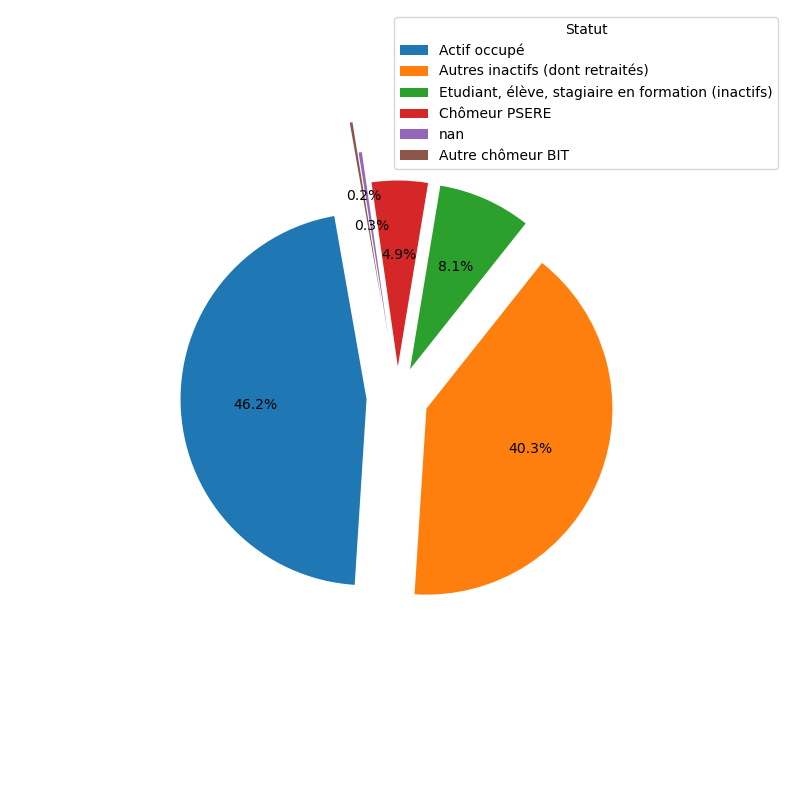

In [162]:
data_pie_2 = data['ACTEU6'].value_counts(dropna=False)

e = (0.1, 0.1, 0.1, 0.1, 0.2, 0.3)
plt.figure(figsize=(10,15))
plt.pie(data_pie_2, explode=e, autopct='%1.1f%%', radius=0.6, startangle= 100)
plt.legend(data_pie_2.index,title="Statut", loc="upper right")
plt.show()

chômeurs 21864
actifs occupés 198054
inactif + occupé 405574
(0.09941887430769651, 0.05115127808009583)


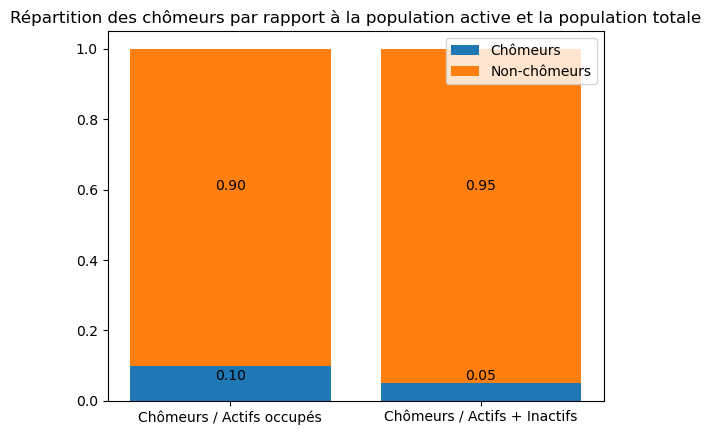

In [251]:
data_pie = data["ACTEU"].value_counts(dropna=False)

names = "Chômeurs / Actifs occupés", "Chômeurs / Actifs + Inactifs"


chom = data_pie["Chômeur"]
act_occ = data_pie["Actif occupé"]
inact_occ = data_pie["Inactif"]+data_pie["Actif occupé"]
print('chômeurs',chom)
print("actifs occupés", act_occ)
print('inactif + occupé',inact_occ)

values_1= chom/(act_occ+chom), chom/(inact_occ+chom)
values_2=(1-(chom/(act_occ+chom))),(1-(chom/(inact_occ+chom)))

print(values_1)

#values_1= data_pie["Chômeur"], data_pie["Chômeur"]

#values_2 = data_pie["Actif occupé"], data_pie["Inactif"]+data_pie["Actif occupé"]

# Create Barplot
plt.bar(names, values_1)
plt.bar(names, values_2, bottom=values_1)
plt.text(0, 0.06, "%.2f" % (chom/(act_occ+chom)), horizontalalignment='center')
plt.text(0, 0.6, "%.2f" % ((1-(chom/(act_occ+chom)))), horizontalalignment='center')
plt.text(1, 0.06, round(chom/(inact_occ+chom), 2), horizontalalignment='center')
plt.text(1, 0.6, round((1-(chom/(inact_occ+chom))), 2), horizontalalignment='center')
plt.legend(["Chômeurs","Non-chômeurs"])
plt.title("Répartition des chômeurs par rapport à la population active et la population totale")
plt.show()

In [222]:
data_pie

ACTEU
Inactif         207520
Actif occupé    198054
Chômeur          21864
NaN               1204
Name: count, dtype: int64

In [241]:
print("Rapport de chômeurs",list(values_1))

Rapport de chômeurs [0.09941887430769651, 0.05115127808009583]


In [252]:
data["ANCCHOM"].unique()

array([nan,  2.,  3.,  4.,  1.,  8.,  7.,  5.,  6.])

In [253]:
data["ANCCHOM"] = data["ANCCHOM"].map({1:"Moins d'un mois",2:"De 1 mois à moins de 3 mois",3:"De 3 mois à moins de 6 mois",4:"De 6 mois à moins d'un an",5:"De 1 an à moins d'un an et demi",6:"De 1 an et demi à moins de 2 ans",7:"De 2 ans à moins de 3 ans",8:"3 ans ou plus","nan":"NaN"})

In [270]:
data_anciennete = data["ANCCHOM"].value_counts()

In [271]:
data_anciennete

ANCCHOM
3 ans ou plus                       3906
De 6 mois à moins d'un an           3648
De 1 an à moins d'un an et demi     3398
De 1 mois à moins de 3 mois         3270
De 3 mois à moins de 6 mois         3193
De 2 ans à moins de 3 ans           2289
De 1 an et demi à moins de 2 ans    1132
Moins d'un mois                      902
Name: count, dtype: int64

In [269]:
data_anciennete.index

Index([                               nan,                    '3 ans ou plus',
              'De 6 mois à moins d'un an',  'De 1 an à moins d'un an et demi',
            'De 1 mois à moins de 3 mois',      'De 3 mois à moins de 6 mois',
              'De 2 ans à moins de 3 ans', 'De 1 an et demi à moins de 2 ans',
                        'Moins d'un mois'],
      dtype='object', name='ANCCHOM')

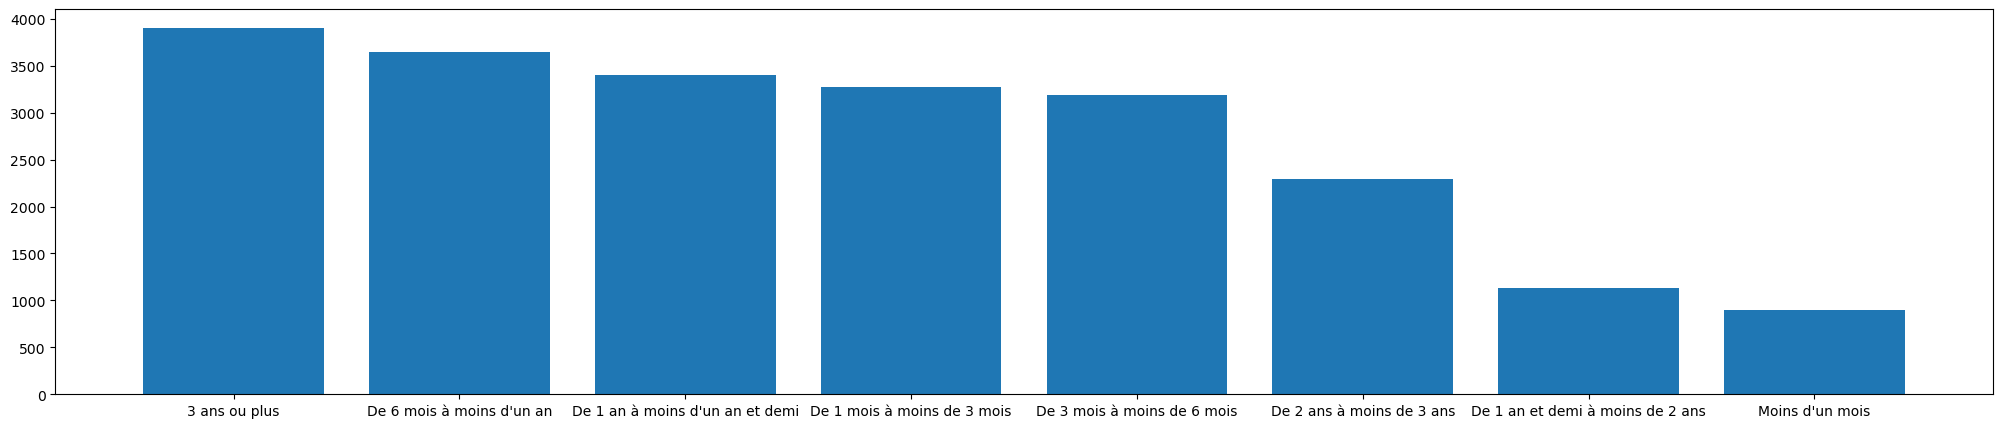

In [285]:
plt.figure(figsize=(25,5))
plt.bar(data_anciennete.index, data_anciennete)

plt.show()

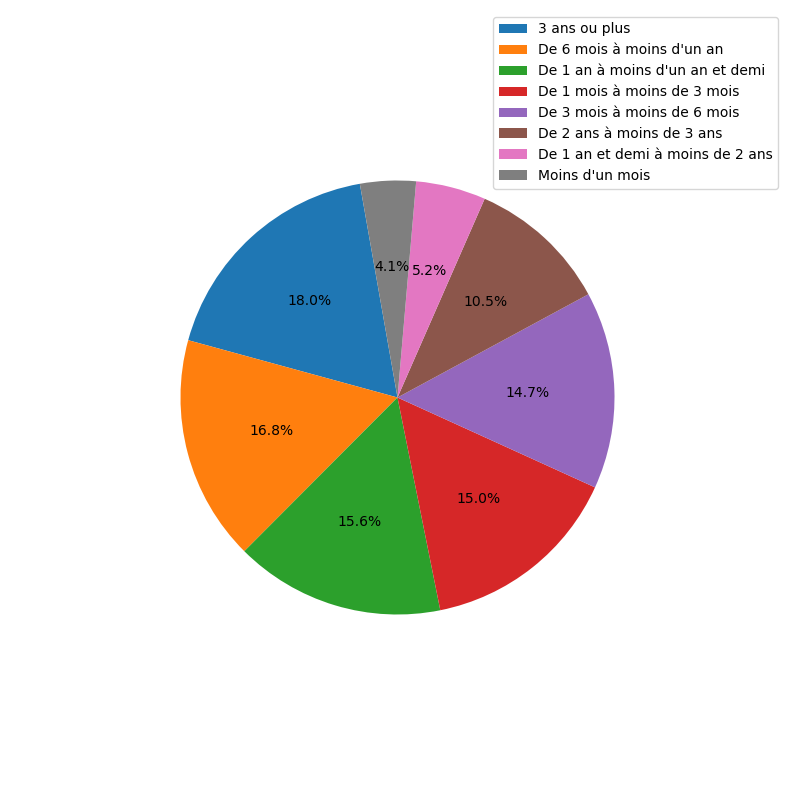

In [ ]:
plt.figure(figsize=(10,15))
plt.pie(data_anciennete, autopct='%1.1f%%', radius=0.7, startangle= 100)
plt.legend(data_anciennete.index, loc="upper right")
plt.show()

In [293]:
data["CONTACT"].unique()

array([nan,  1.,  2.])

In [296]:

data["CONTACT"] = data["CONTACT"].map({1:"Oui",2:"Non","nan":"NaN"})

In [297]:
data['CONTACT'].value_counts(dropna=False)

CONTACT
NaN    399514
Non     15984
Oui     13144
Name: count, dtype: int64

In [298]:
data_contact = data["CONTACT"].value_counts()

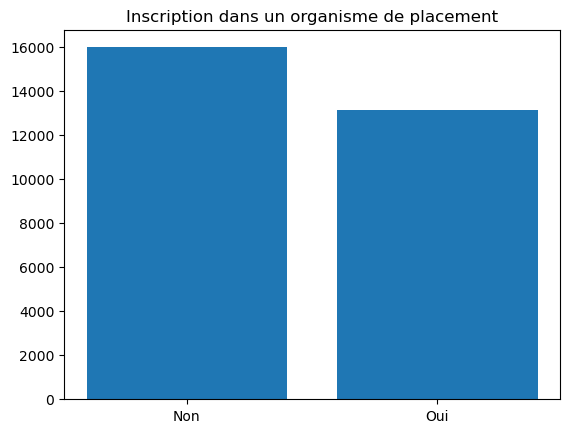

In [301]:
plt.bar(data_contact.index, data_contact)
plt.title("Inscription dans un organisme de placement")
plt.show()

In [335]:
data["CREACCP"].value_counts()

CREACCP
7.0     6775
2.0     2779
3.0     2462
6.0     1820
1.0     1582
4.0     1404
11.0    1392
12.0    1223
5.0     1102
13.0     894
8.0      598
10.0     354
9.0      216
Name: count, dtype: int64

In [ ]:
def creaccp(x):
    dict = {1 :"Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)",
2: "Désire un emploi plus intéressant",
3: "Veut un emploi plus stable (CDI)",
4: "Veut travailler plus d'heures",
5: "Désire un travail avec un rythme horaire plus adapté ou plus modulable",
6: "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé",
7: "Désire augmenter ses revenus",
8: "Désire diminuer son temps de transport",
9: "Doit ou veut déménager",
10: "Veut s'installer à son compte",
11: "Veut changer de métier ou de secteur",
12: "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles",
13: "Autre raison",
"nan":"Nan"}

    return dict[x]
    


In [336]:
data["CREACCP"] = data["CREACCP"].dropna().apply(lambda x : creaccp(x))

In [352]:

data_count = data["CREACCP"].value_counts()
display(data_count)

CREACCP
Désire augmenter ses revenus                                                          6775
Désire un emploi plus intéressant                                                     2779
Veut un emploi plus stable (CDI)                                                      2462
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé           1820
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)    1582
Veut travailler plus d'heures                                                         1404
Veut changer de métier ou de secteur                                                  1392
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles        1223
Désire un travail avec un rythme horaire plus adapté ou plus modulable                1102
Autre raison                                                                           894
Désire diminuer son temps de transport                                            

In [ ]:
data_count.sum()-data_count["Autre raison"]

data_count= data_count.sort_values(ascending=True)


CREACCP
Doit ou veut déménager                                                                 216
Veut s'installer à son compte                                                          354
Désire diminuer son temps de transport                                                 598
Autre raison                                                                           894
Désire un travail avec un rythme horaire plus adapté ou plus modulable                1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles        1223
Veut changer de métier ou de secteur                                                  1392
Veut travailler plus d'heures                                                         1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)    1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé           1820
Veut un emploi plus stable (CDI)                                                  

In [411]:
data_count = round(data["CREACCP"].value_counts(normalize=True)*100,2).sort_values(ascending=True)
liste = [x for x in data_count]
print(liste)

[0.96, 1.57, 2.65, 3.96, 4.88, 5.41, 6.16, 6.21, 7.0, 8.05, 10.89, 12.3, 29.98]


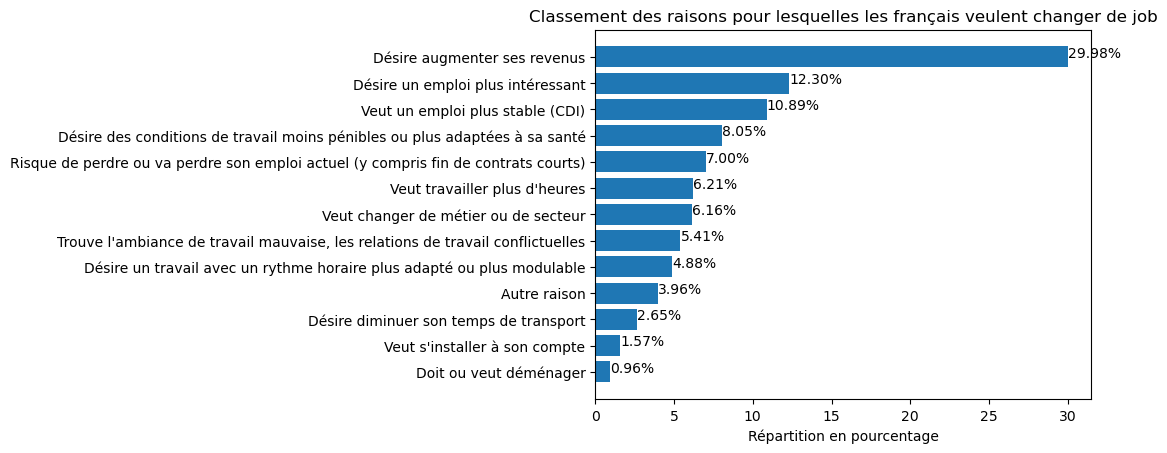

In [413]:
plt.barh(data_count.index, data_count)
plt.title("Classement des raisons pour lesquelles les français veulent changer de job")
plt.xlabel("Répartition en pourcentage")

for i in range(len(liste)):
    plt.text(liste[i], i, "%1.2f%%" %liste[i])


#for index, value in data_count.items():
#    plt.text(value, index, "%1.2f%%" %value)
plt.show()

In [489]:
import numpy as np 

data_hrec = data["HREC"]
num_bins = len(data["HREC"].value_counts())
num_bins = 20
mu = data_hrec.mean()
sigma = data_hrec.std()


y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))


In [482]:
print(data_hrec)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
428637   NaN
428638   NaN
428639   NaN
428640   NaN
428641   NaN
Name: HREC, Length: 428642, dtype: float64


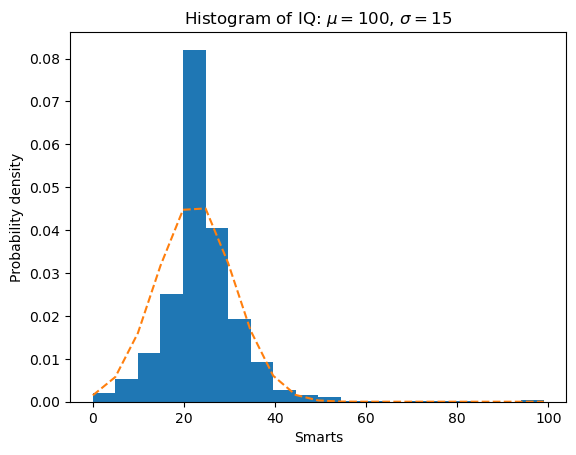

In [490]:


# the histogram of the data
n, bins, patches = plt.hist(data_hrec, 20, density=1)


plt.plot(bins, y, '--')
plt.xlabel('Smarts')
plt.ylabel('Probability density')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.show()
